# **Linear Support Vector Machine classifier**


# **Iris dataset**


Input variables
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

Output variable
5. class: Iris Setosa, Iris Versicolour, Iris Virginica



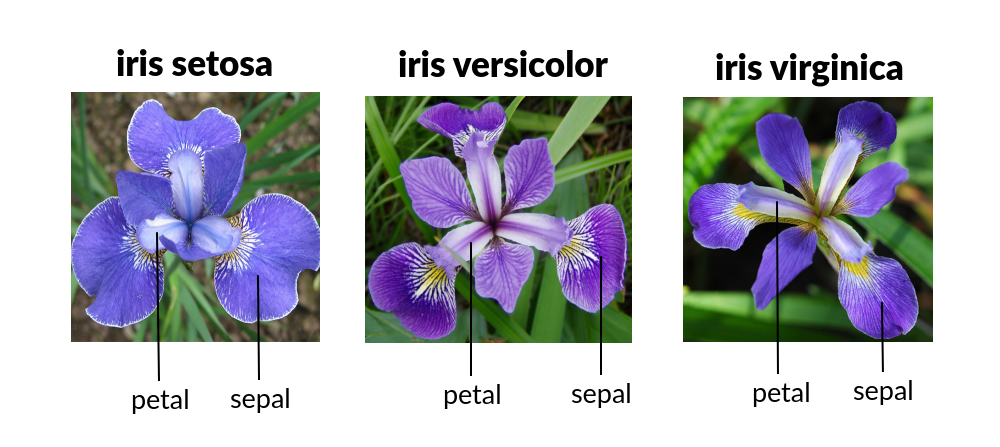
[Image Source](https://www.kaggle.com/alexisbcook/distributions)

**Import basic libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets
from pandas.plotting import scatter_matrix

In [ ]:
# Import the libraries for performing classification
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

**Download Iris dataset from UCI Machine Learning Repository**

In [ ]:
#Define the column names
col_name=["sepal_length_in_cm", "sepal_width_in_cm","petal_length_in_cm","petal_width_in_cm", "class"]

#Read the dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None, names= col_name)

In [ ]:
# to check the type of data variable

type(df)

pandas.core.frame.DataFrame

In [ ]:
# Display first five rows of the dataset
df.head()

# Display last five rows of the dataset
df.tail()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# **Visualizing dataset and features**

**About sns.pairplot()**

Plot pairwise relationships in a dataset.
By default, uses scatterplot() for each pairing of the variables and histplot() for the marginal plots along the diagonal.


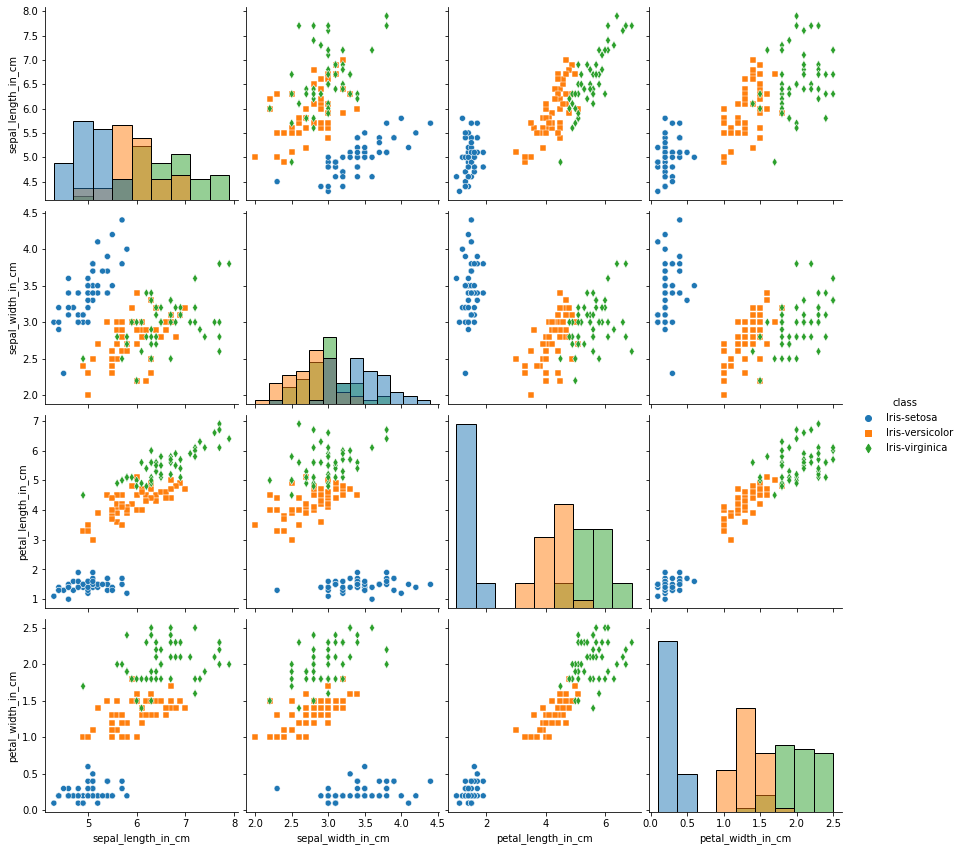

In [ ]:
sns.pairplot(df,height = 3, hue="class", diag_kind="hist", markers=["o", "s", "d"]) # hue is the variable in "data" to map plot aspects to different colors.

# Binary SVM classification

In [ ]:
data = df
# get names of indexes for which column 'class' has value 'Iris-virginica'
index_names = data[ data["class"] == 'Iris-virginica' ].index
  
# drop these row indexes
# from dataFrame
data.drop(index_names, inplace = True)
  
data

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [ ]:
# Simply converting class names into categorical column
data = data.replace({"class":  {"Iris-setosa":1,"Iris-versicolor":-1}})

# Visualize the label
data.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
print("Size of the dataset", data.shape) # output - (rows, columns)

Size of the dataset (100, 5)


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length_in_cm  100 non-null    float64
 1   sepal_width_in_cm   100 non-null    float64
 2   petal_length_in_cm  100 non-null    float64
 3   petal_width_in_cm   100 non-null    float64
 4   class               100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.7 KB
None


In [ ]:
data.describe()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.094000,2.862000,0.785000,0.000000
std,0.641698,0.476057,1.448565,0.566288,1.005038
min,4.300000,2.000000,1.000000,0.100000,-1.000000
25%,5.000000,2.800000,1.500000,0.200000,-1.000000
50%,5.400000,3.050000,2.450000,0.800000,0.000000
75%,5.900000,3.400000,4.325000,1.300000,1.000000
max,7.000000,4.400000,5.100000,1.800000,1.000000


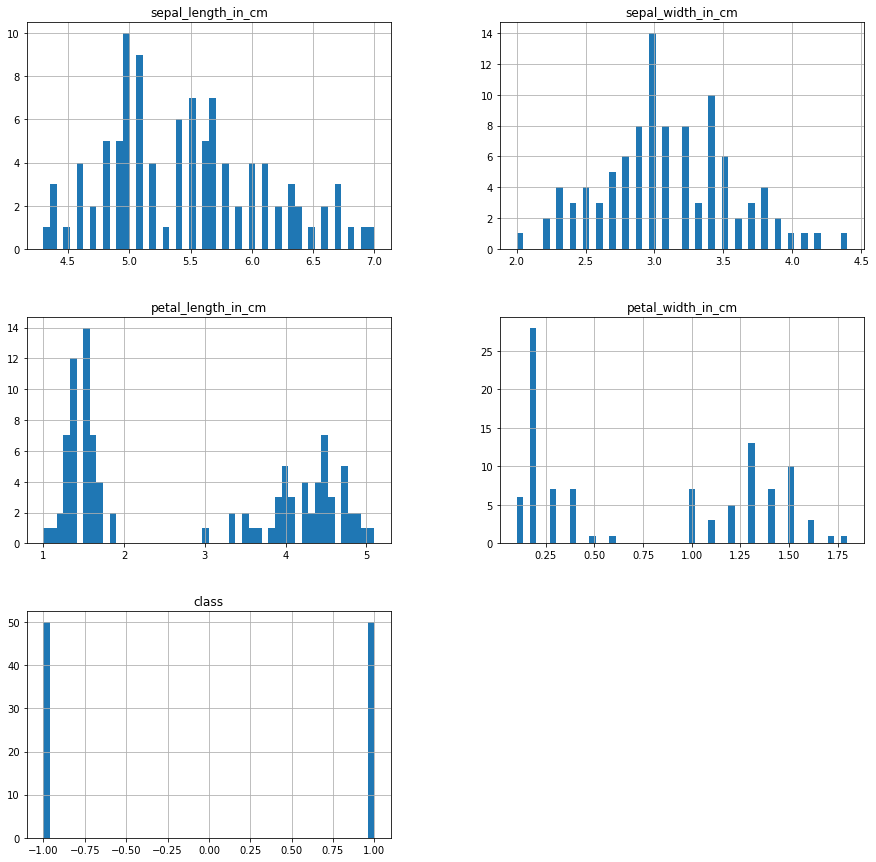

In [ ]:
data.hist(bins=50,figsize=(15,15))
# display histogram
plt.show()

In [ ]:
# Separatre the input and output feature values

X = data.iloc[:,:-1]
y = data.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print('Shape of training data',X_train.shape)
print('Shape of training labels', y_train.shape)
print('Shape of testing data', X_test.shape)
print('Shape of testing labels',y_test.shape)

Shape of training data (75, 4)
Shape of training labels (75,)
Shape of testing data (25, 4)
Shape of testing labels (25,)


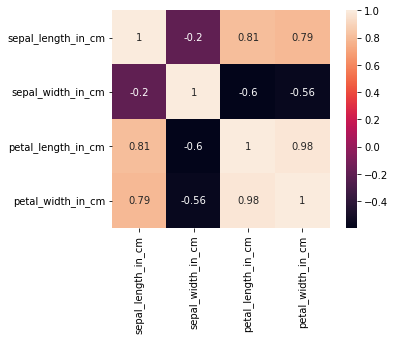

In [ ]:
# Understanding the correlation between Input features

plt.figure()
sns.heatmap(X.corr(),annot = True, square = True)

## **Perform Classification**

In [ ]:
pipe_1 = Pipeline([('scaler', MinMaxScaler()),
                         ("classifier", LinearSVC(C=1))])
pipe_1.fit(X_train,y_train)

# Evaluate the model using crossvalidation
acc = cross_val_score(pipe_1, X_train, y_train,cv=10)
print("Accuracy: {:.2f} %".format(acc.mean()*100))

Accuracy: 100.00 %


**Confusion Matrix**

A confusion matrix is a summary of prediction results on a classification problem. 

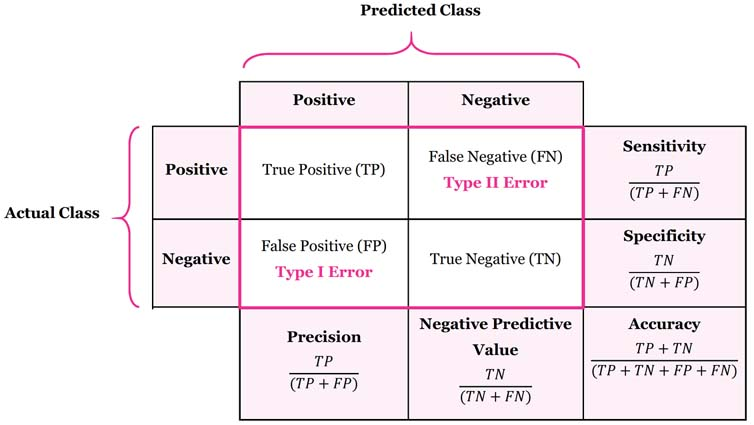

[Source](https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html)

In [ ]:
y_pred = pipe_1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix \n', cm) 

Confusion matrix 
 [[12  0]
 [ 0 13]]


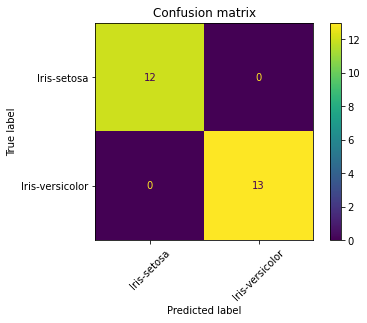

In [ ]:
# visualizing the confusion matrix
class_names=["Iris-setosa","Iris-versicolor"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.title('Confusion matrix')
plt.show()

In [ ]:
CR = classification_report(y_test, y_pred)
print('Classification report \n')
print(CR)

Classification report 

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



area under curve (AUC):  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


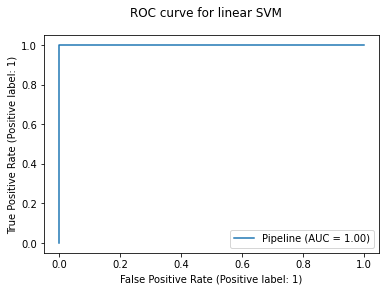

In [ ]:
roc_svm = plot_roc_curve(pipe_1, X_test, y_test)
roc_svm.figure_.suptitle("ROC curve for linear SVM")
print("area under curve (AUC): ", metrics.roc_auc_score(y_test, y_pred))


## **Accuracy versus the Hyper Parameter C**

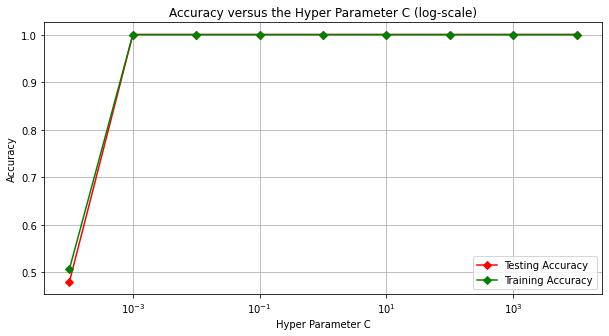

In [ ]:
acc = []
acc_tr = []
coefficient = []
C = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for c in C:
    SVM = LinearSVC(dual=False, C=c)
    SVM.fit(X_train, y_train.ravel())
   
    p_tr = SVM.predict(X_train)
    a_tr = metrics.accuracy_score(y_train.ravel(), p_tr)
    
    pred = SVM.predict(X_test)
    a = metrics.accuracy_score(y_test.ravel(), pred)
    
    acc_tr.append(a_tr)
    acc.append(a)

plt.subplots(figsize=(10, 5))
plt.semilogx(C, acc,'-gD' ,color='red' , label="Testing Accuracy")
plt.semilogx(C, acc_tr,'-gD' , label="Training Accuracy")
plt.grid(True)
plt.xlabel("Hyper Parameter C")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Accuracy versus the Hyper Parameter C (log-scale)')
plt.show()

## Visualizing the decision boundary

Let us consider sepal length and sepal width for visualizing the SVM decision boundary.

In [ ]:
X=np.array(X_train)
y=np.array(y_train)
# Let us consider sepal length and sepal width
X=X[:,(0,1)]
X.shape

(75, 2)

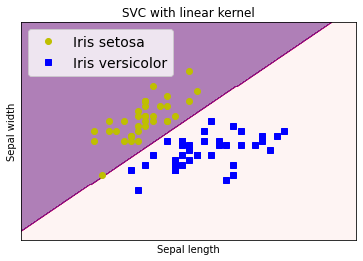

In [ ]:
h = .02  # step size in the mesh
C = 1  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. 
# For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdPu, alpha=0.5)

# Plot also the training points
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "yo", label="Iris setosa")
plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "bs", label="Iris versicolor")

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.legend(loc="upper left", fontsize=14)
plt.title('SVC with linear kernel')
plt.show()

# Multiclass classification

### With sepal features

Let us use the two Sepal features i.e., sepal width and length for performning multiclass classification.

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the two Sepal features.
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Create the training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Create a pipeline

pipe_2 = Pipeline([('scaler', MinMaxScaler()),
                         ("classifier", svm.SVC(kernel='linear', decision_function_shape='ovr', C=1, class_weight=None))])

# Fit the estimator , pipeline

pipe_2.fit(X_train,y_train)

# Get the predictions

y_pred = pipe_2.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n', cm)

Confusion matrix : 
 [[15  0  0]
 [ 0  7  4]
 [ 0  2 10]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precisionScore = precision_score(y_test, y_pred, average='micro')
recallSscore = recall_score(y_test, y_pred, average='micro')
f1Score = f1_score(y_test, y_pred, average='micro')

print("Precision: {:.2f} %".format(precisionScore))
print("Recall: {:.2f} %".format(recallSscore))
print("f1_Score: {:.2f} %".format(f1Score))

Precision: 0.84 %
Recall: 0.84 %
f1_Score: 0.84 %


We can also get these metrics using classification_report.

In [ ]:
class_names=["Iris-setosa","Iris-versicolor","Iris-virginica"]

print(classification_report(y_test, y_pred, target_names=class_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.78      0.64      0.70        11
 Iris-virginica       0.71      0.83      0.77        12

       accuracy                           0.84        38
      macro avg       0.83      0.82      0.82        38
   weighted avg       0.85      0.84      0.84        38



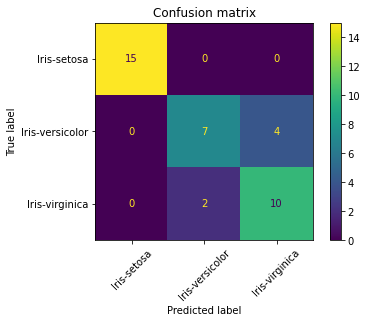

In [ ]:
# Display the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.title('Confusion matrix')
plt.show()

In [ ]:
# Evaluate the model using crossvalidation
acc = cross_val_score(pipe_2, X_train, y_train,cv=10)
print(acc)
print("Accuracy: {:.2f} %".format(acc.mean()*100))

[0.66666667 0.91666667 0.72727273 0.81818182 0.63636364 1.
 0.72727273 0.81818182 0.81818182 0.63636364]
Accuracy: 77.65 %


#### Visualizing the decision boundary

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


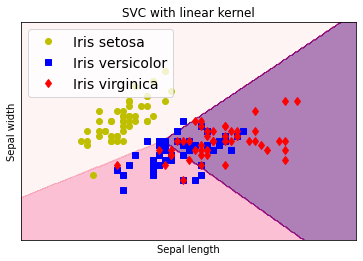

In [ ]:
h = .02  # step size in the mesh
C = 1  # SVM regularization parameter
svc = LinearSVC(C=C, max_iter = 100).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. 
# For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdPu, alpha=0.5)

# Plot also the training points
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "rd", label="Iris virginica")


plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.legend(loc="upper left", fontsize=14)
plt.title('SVC with linear kernel')
plt.show()

From the above figure, you can observe that the classes versicolor and virginica are overlapping and a linear SVM couldn't separate the classes using sepal features. 

#### Testing different C parameter

In [ ]:
def plotSVC(title):
  # create a mesh to plot in
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  h = (x_max / x_min)/100
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
  plt.subplot(1, 1, 1)
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
  # Plot also the training points
  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
  plt.plot(X[:, 0][y==2], X[:, 1][y==2], "rd", label="Iris virginica")  
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.legend(loc="upper left", fontsize=14)
  plt.xlim(xx.min(), xx.max())
  plt.title(title)
  plt.show()

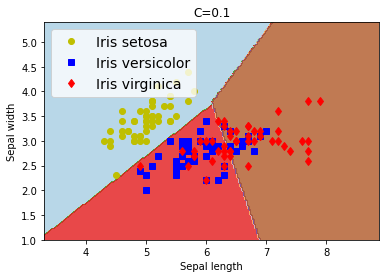

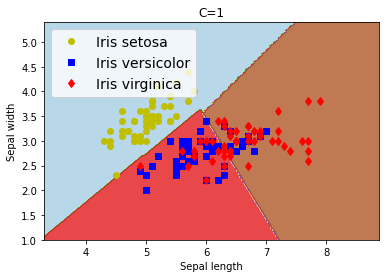

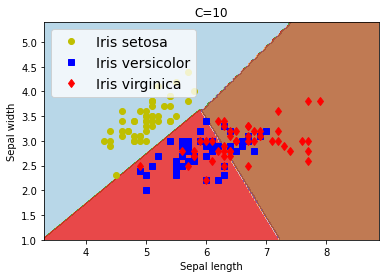

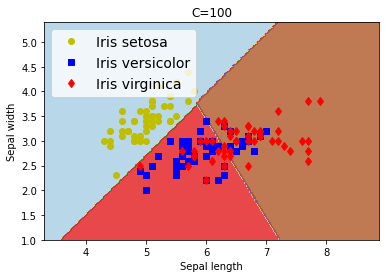

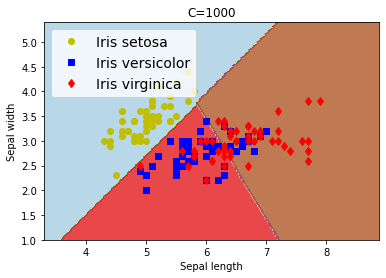

In [ ]:
c_values = [0.1, 1, 10, 100, 1000]
for c in c_values:
   svc = svm.SVC(kernel='linear', C=c).fit(X, y)
   plotSVC('C=' + str(c))

### With petal features

Let us now use the petal width and length.

In [ ]:
X = iris.data[:, 2:]  # we only take the last two features.
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Visualizing the decision boundary

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


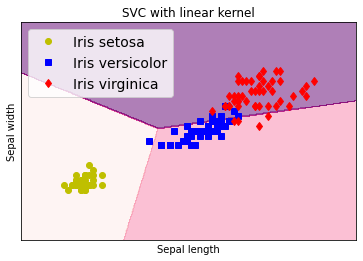

In [ ]:
h = .02  # step size in the mesh
C = 1  # SVM regularization parameter
svc = LinearSVC(C=C, max_iter = 100).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. 
# For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdPu, alpha=0.5)

# Plot also the training points
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "rd", label="Iris virginica")


plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.legend(loc="upper left", fontsize=14)
plt.title('SVC with linear kernel')
plt.show()

## Using Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

SVC = svm.SVC(kernel='linear', decision_function_shape='ovr', C=1, class_weight=None)
param_grid = {'C':[0.1,1,10,100]}
gridclf = GridSearchCV(SVC, param_grid, refit = True, verbose=3)
gridclf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............................C=0.1;, score=1.000 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.957 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.864 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=1.000 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.955 total time=   0.0s
[CV 1/5] END ...............................C=1;, score=0.957 total time=   0.0s
[CV 2/5] END ...............................C=1;, score=0.957 total time=   0.0s
[CV 3/5] END ...............................C=1;, score=0.818 total time=   0.0s
[CV 4/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 5/5] END ...............................C=1;, score=0.955 total time=   0.0s
[CV 1/5] END ..............................C=10;, score=1.000 total time=   0.0s
[CV 2/5] END ..............................C=10;,

GridSearchCV(estimator=SVC(C=1, kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100]}, verbose=3)

In [ ]:
print("Best estimator found by grid search:")
print(gridclf.best_estimator_)

Best estimator found by grid search:
SVC(C=10, kernel='linear')


Let us predict using the Grid model

In [ ]:
pred_grid = gridclf.predict(X_test)
print(confusion_matrix(y_test, pred_grid))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


## Using Randomized search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

SVC = svm.SVC(kernel='linear', decision_function_shape='ovr', C=1, class_weight=None)
param_grid = {'C':[0.1,1,10,100]}
randclf = RandomizedSearchCV(SVC, param_grid, refit = True, verbose=3)
randclf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............................C=0.1;, score=1.000 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.957 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.864 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=1.000 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.955 total time=   0.0s
[CV 1/5] END ...............................C=1;, score=0.957 total time=   0.0s
[CV 2/5] END ...............................C=1;, score=0.957 total time=   0.0s
[CV 3/5] END ...............................C=1;, score=0.818 total time=   0.0s
[CV 4/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 5/5] END ...............................C=1;, score=0.955 total time=   0.0s
[CV 1/5] END ..............................C=10;, score=1.000 total time=   0.0s
[CV 2/5] END ..............................C=10;,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(estimator=SVC(C=1, kernel='linear'),
                   param_distributions={'C': [0.1, 1, 10, 100]}, verbose=3)

In [ ]:
print("Best estimator found by randomized search:")
print(randclf.best_estimator_)

Best estimator found by randomized search:
SVC(C=10, kernel='linear')


In [ ]:
pred_rand = randclf.predict(X_test)
print(confusion_matrix(y_test, pred_rand))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
